# Monty Hall problem
[Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem)

In [74]:
import numpy as np
np.random.seed(42)

def monty_hall(switch = False, nr_doors = 3):
    doors = np.zeros((nr_doors)).astype(np.bool)
    #Set one door to have a car
    doors[np.random.randint(0,nr_doors)] = True

    #Make a selection
    selection = np.zeros((nr_doors)).astype(np.bool)
    selection[np.random.randint(0,nr_doors)] = True

    #Open one door not selected and not with a car
    index = (~selection & ~doors)
    doors_open = np.zeros((nr_doors)).astype(np.bool)
    index = np.random.choice(np.where(~selection & ~doors)[0])
    doors_open[index] = True

    #Do you switch?
    if switch: 
        #This does not work with varible doors
        selection = (~selection & ~doors_open)

    return (selection == doors).all()


<Axes: xlabel='Result', ylabel='Count'>

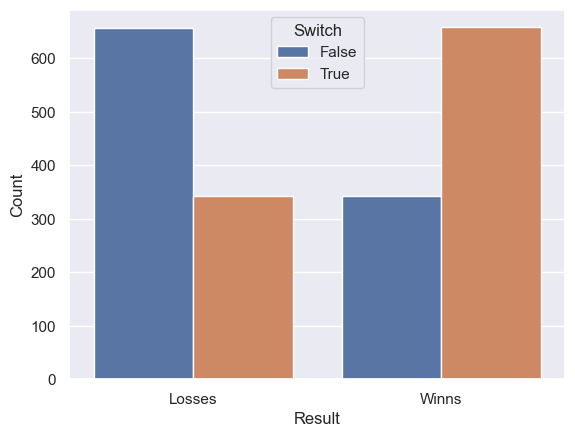

In [89]:
numer_of_runs = 1000
results = {'Result': [], 'Count': [], 'Switch': []}
for i, switch in enumerate([False, True]):
    tmp = np.zeros((2))
    for i in range(numer_of_runs):
        tmp[int(monty_hall(switch))] +=  1
    results['Result'].append('Losses')
    results['Count'].append(tmp[0])
    results['Switch'].append(switch)
    results['Result'].append('Winns')
    results['Count'].append(tmp[1])
    results['Switch'].append(switch)
    
import seaborn as sns
sns.set_theme()
sns.barplot(results, x = 'Result', y = 'Count', hue = 'Switch')

0